<a href="https://colab.research.google.com/github/josibelaver/josibelaver/blob/main/Predicao_valor_imoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PREDIÇÃO DO VALOR DE IMÓVEIS - Josiane Belaver

# INTRODUÇÃO E CONTEXTO:
A Creditas é a principal plataforma online de empréstimo com garantia do país.

Dentre os seus produtos, há o empréstimo com imóvel em garantia. 


# Problemática

A pessoa acessa o site da Creditas e solicita um empréstimo oferecendo seu imóvel como garantia. Para aprovar, a Creditas precisa saber se esse imóvel tem liquidez, se é uma garantia segura. 

Outra questão também, é verificar quanto o imóvel vale para saber o quanto oferecer de empréstimo.

# Objetivo

O objetivo principal deste trabalho foi predizer, através de machine learning, o valor dos imóveis usando uma base de dados da cidade de São Paulo.

## Sobre esta predição

Este trabalho foi elaborado durante a 4ª Imersão de Dados da Alura em parceria com a Creditas.

# IMPORTAÇÕES

In [658]:
# Bibliotecas básicas para análise e visualização de dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas de modelos de Machine Learning (ML)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# COLETA DE DADOS

A base de dados dos imóveis, da cidade de São Paulo, foi disponibilizada pela equipe da imersão através do Kaggle e está disponível [neste link](https://www.kaggle.com/datasets/kaggleshashankk/house-price-data-of-sao-paulo).

In [554]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [555]:
#mostrando todos os dados para sabermos quantas linhas tem no total
dados

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês


In [556]:
#mostrando uma linha aleatória do dado
dados.sample() 

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6315,NaN,Jardim Jabaquara,São Paulo,245,3,4,6,R$ 795.000


In [557]:
'''Mostrando 10 dados aleatórios para explorar melhor. E já é possível verificar
na coluna "Rua" palavras "NaN" que significam que o nome da rua não foi preenchido e valores dos imóveis
bem diferentes podendo dar algum problema na hora de calcular a média.'''
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
2077,NaN,Jardim Marajoara,São Paulo,400,4,3,4,R$ 2.950.000
7557,Rua Melo Morais Filho,Jardim Guedala,São Paulo,545,4,6,10,R$ 8.500.000
4640,NaN,Jardim América,São Paulo,650,5,6,8,R$ 20.000.000
180,Rua Eduardo da Silva Magalhães,Parque Continental,São Paulo,350,5,7,7,R$ 2.500.000
6089,Rua Eva Bloch,Bosque da Saúde,São Paulo,155,4,3,4,R$ 1.500.000
4467,Rua João do Prado,Aclimação,São Paulo,350,4,6,5,R$ 3.000.000
4831,NaN,Parque Jabaquara,São Paulo,305,4,6,4,R$ 1.950.000
757,NaN,Butantã,São Paulo,480,3,4,5,R$ 2.950.000
3470,Avenida Fulfaro,Vila Clara,São Paulo,120,2,1,1,R$ 399.000
4244,NaN,Vila Olímpia,São Paulo,200,2,3,2,R$ 2.900.000


In [558]:
#selecionando somente uma coluna.
dados["Bairro"] 

0         Planalto Paulista
1        Jardim dos Estados
2           Jardim Reimberg
3            Jardim Morumbi
4                     Mooca
                ...        
10003            Vila Sofia
10004       Bosque da Saúde
10005         Vila da Saúde
10006         Vila Oratório
10007           Vila Alpina
Name: Bairro, Length: 10008, dtype: object

In [559]:
#selecionando somente o bairro (series) da linha (index) 6522
dados["Bairro"][6522] 

'Vila Paulo Silas'

In [560]:
''' Explorando um pouco mais as informações gerais sobre os dados e aqui é possível ver
"valor", como "object" e este tipo não é possível tirar a média, vai ser preciso tratá-lo primeiro.'''

dados.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [561]:
#media da metragem dos imóveis:
dados["Metragem"].mean() 

442.30065947242207

In [562]:
#verificando se existe este bairro na tabela original:
dados["Bairro"] == "Vila Mariana" 

0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Bairro, Length: 10008, dtype: bool

In [563]:
''' Transformando os booleans em 0 ou 1 pra poder somar e vizualizar a
quantidade total de imóveis neste bairro.'''

sum((dados["Bairro"] == "Vila Mariana"))

184

In [564]:
''' Como obtivemos dados booleans (True/False), foi criada uma variável para mostrar somente os "True" que,
neste caso seriam apenas os 184 bairros da Vila Mariana'''

tem_imoveis_vila = (dados["Bairro"] == "Vila Mariana")
tem_imoveis_vila  

0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Bairro, Length: 10008, dtype: bool

In [565]:
#mostrando os imóveis Vila Mariana (os 184 identificados anteriormente)
dados[tem_imoveis_vila] 

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


In [566]:
#foi criada uma variável para análise da metragem, posteriormente.

imoveis_vila_mariana = dados [tem_imoveis_vila]
imoveis_vila_mariana

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


In [567]:
#media da metragem do bairro vila mariana.
imoveis_vila_mariana["Metragem"].mean()

233.6195652173913

In [568]:
#Series com a contagem de imóveis anunciados para venda em cada bairro:

dados["Bairro"].value_counts() 

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

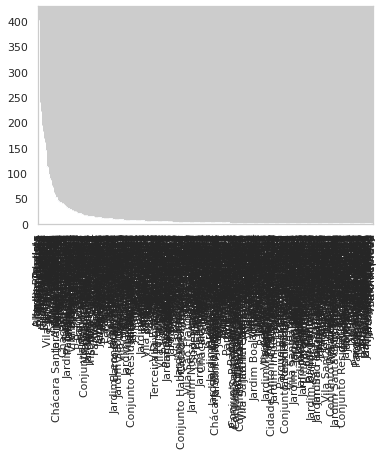

In [569]:
#Criando um grafico para melhorar a vizualização da tabela acima.
n_imoveis_bairro = dados["Bairro"].value_counts() 
n_imoveis_bairro.plot.bar()                       

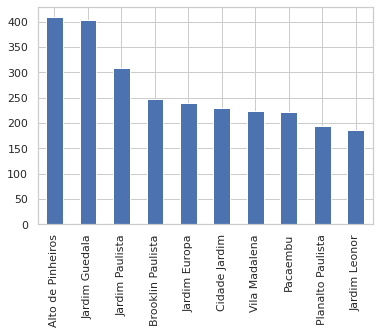

In [570]:
#"head(10)" para selecionar apenas 10 bairros e melhorar a visualização:

n_imoveis_bairro = dados["Bairro"].value_counts()
n_imoveis_bairro.head(10).plot.bar()   

In [571]:
#Realizando a média da metragem pra cada um dos bairros:

dados.groupby("Bairro")["Metragem"].mean()

Bairro
Aclimação           253.06
Alto da Boa Vista   418.88
Alto da Lapa        294.34
Alto da Mooca       270.05
Alto de Pinheiros   433.44
                     ...  
Vila Água Funda     152.20
Água Branca         191.00
Água Fria           165.42
Água Funda          139.00
Água Rasa           340.25
Name: Metragem, Length: 701, dtype: float64

In [572]:
# Outras formas de selecionar os dados por bairro (consultado nos métodos da documentação Pandas).

dados.groupby("Bairro").mean()

,Metragem,Quartos,Banheiros,Vagas
Bairro,,,,
Aclimação,253.06,3.32,3.08,2.91
Alto da Boa Vista,418.88,4.12,5.12,4.62
Alto da Lapa,294.34,3.15,3.79,3.91
Alto da Mooca,270.05,3.30,2.60,3.65
Alto de Pinheiros,433.44,3.94,4.84,5.00
...,...,...,...,...
Vila Água Funda,152.20,2.60,2.20,2.60
Água Branca,191.00,3.15,3.08,2.46
Água Fria,165.42,2.83,3.42,2.50


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda6a6bf8d0>,
      dtype=object)

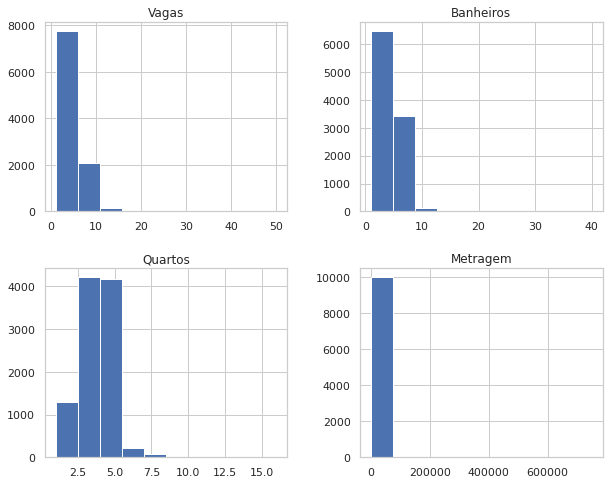

In [573]:
#Explorando alguns gráficos de outras variáveis.

dados[["Vagas", "Banheiros", "Quartos", "Metragem"]].hist(figsize=(10, 8))

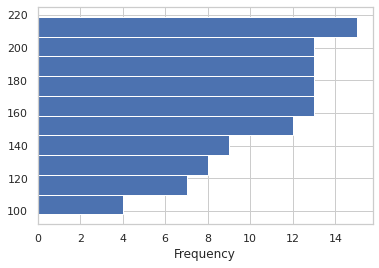

In [574]:
n_imoveis_bairro = dados["Metragem"].value_counts()
n_imoveis_bairro.head(15).plot.hist(orientation="horizontal", cumulative=True)

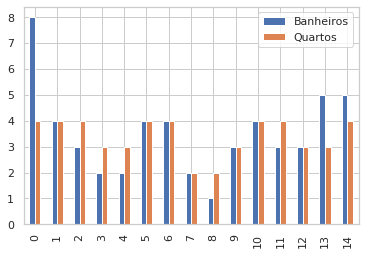

In [575]:
n_imoveis_bairro = pd.DataFrame(dados, columns=["Banheiros", "Quartos"])
n_imoveis_bairro.head(15).plot.bar()

In [576]:
#Outras estatísticas dos dados: média, mediana, min, max da metragem dos imóveis:

dados['Metragem'].mean(), dados['Metragem'].median(), dados['Metragem'].min(), dados['Metragem'].max()

(442.30065947242207, 290.0, 10, 750000)

In [577]:
#Descobrindo quais são os bairros que não tem nome de Rua.

dados_rua = dados["Rua"].isna()
dados_rua

0        False
1        False
2        False
3         True
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Rua, Length: 10008, dtype: bool

In [578]:
#continuação - Foi encontrado 3434 bairros com a coluna "Rua" vazia.

dados[dados_rua]['Bairro']

3                         Jardim Morumbi
11                      Jardim Luzitânia
31                        Parque da Lapa
56      Chácara Santo Antônio (Zona Sul)
57                        Jardim Guedala
                      ...               
9963                   Jardim Petrópolis
9989                Parque Alves de Lima
9991                        Vila Formosa
9995                       Jardim Leonor
9999                   Jardim Petrópolis
Name: Bairro, Length: 3434, dtype: object

# TRATAMENTO DE DADOS E PRIMEIROS GRÁFICOS

In [579]:
#Pegando o primeiro valor da tabela:

dados["Valor"][0]

'R$ 7.000.000'

In [580]:
#Separando a string com split:

dados["Valor"][0].split()

['R$', '7.000.000']

In [581]:
'''Esta separação com split é importante porque algumas index (linhas) da series (coluna) "Valor" podem
ter sido preenchidas com mais elementos do que somente "R$" e o valor do imóvel, como podemos
verificar no imóvel 837 - "R$ 35.000/n/Mês. Este valor pode ficar de fora do cálculo de média, por exemplo.'''

dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
5707,Rua Muribeca,Cidade Jardim,São Paulo,450,4,2,3,R$ 3.500.000
5744,NaN,Butantã,São Paulo,282,4,5,3,R$ 1.650.000
9366,Rua Baturité,Aclimação,São Paulo,156,3,4,1,R$ 800.000
3817,Rua Marselhesa,Vila Mariana,São Paulo,145,4,6,1,R$ 2.880.000
8637,NaN,Jardim Prudência,São Paulo,155,3,3,2,R$ 740.000
4993,Rua Albina Barbosa,Aclimação,São Paulo,240,4,4,3,R$ 1.999.900
3758,Rua Muniz de Sousa,Aclimação,São Paulo,265,3,3,1,R$ 2.000.000
1097,Rua Armando Penteado,Higienópolis,São Paulo,530,3,4,6,R$ 25.000\n /Mês
8235,NaN,Jardim da Glória,São Paulo,238,3,2,5,R$ 2.000.000
4141,"Rua Professor Luciano Gualberto, 282",Jardim Morumbi,São Paulo,600,4,6,2,R$ 2.900.000


In [582]:
#Separando os elementos:
dados["Valor"].str.split()

0          [R$, 7.000.000]
1          [R$, 3.700.000]
2            [R$, 380.000]
3            [R$, 685.000]
4            [R$, 540.000]
               ...        
10003        [R$, 665.000]
10004      [R$, 2.300.000]
10005      [R$, 1.050.000]
10006    [R$, 2.200, /Mês]
10007        [R$, 270.000]
Name: Valor, Length: 10008, dtype: object

In [583]:
#Criando um Dataframe para cada dado acima, com "expand".

dados["Valor"].str.split(expand = True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [584]:
#Explorando a fundo para ver se tem cifrão em todas as linhas da coluna 0:

dados["Valor"].str.split(expand = True)[0].unique() 

array(['R$'], dtype=object)

É sempre bom explorar linha por linha de todas as colunas só para garantir que elas foram preenchidas de forma correta.


In [585]:
#Verificando a quantidade de preços iguais da coluna 1, utilizando "unique":
dados["Valor"].str.split(expand = True)[1].unique()

array(['7.000.000', '3.700.000', '380.000', ..., '553.000', '951.000',
       '2.200'], dtype=object)

In [586]:
#Utilizando "len" para fazer a contagem dos "array" obtidos acima:
#Obtivemos 1038 preços iguais.

len(dados["Valor"].str.split(expand = True)[1].unique())

1038

In [587]:
#Conferindo a coluna 2:

dados["Valor"].str.split(expand = True)[2].unique()

'''É possível observar que não aparecem somente "mês", mas sim: "Dia", "Ano".
Indicando que a tabela não possui somente valores de venda, mas também de alugéis. 
E valores de aluguéis não são serão utilizados neste projeto.'''

'É possível observar que não aparecem somente "mês", mas sim: "Dia", "Ano".\nIndicando que a tabela não possui somente valores de venda, mas também de alugéis. \nE valores de aluguéis não são serão utilizados neste projeto.'

In [588]:
#Mantendo a separação anterior criando 3 novas colunas para separar no dataframe o valores de alugueis e de venda.
dados[["Moeda", "Valor_anuncio","Tipo_anuncio"]]=dados["Valor"].str.split(expand=True)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [589]:
#Perguntando pro "tipo_anuncio" se ele é vazio. Se for, é possível selecionar somente os imóveis para venda.
dados[dados["Tipo_anuncio"].isnull()] 

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


"isnull" retorna uma coluna "True/False".
Abaixo, foi usado "unique" para aparecer só os dados nulos (isnull)

In [590]:
dados[dados["Tipo_anuncio"].isnull()]["Tipo_anuncio"].unique()

array([None], dtype=object)

In [591]:
#Mostrando um dataframe somente com os valores "True" que são nulos (para deixar somente os valores de venda) 
dados_vendas = dados[dados["Tipo_anuncio"].isnull()]
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


In [592]:
'''Agora é possível verificar que reduziram as quantidades de linhas: 9156 das 10007 iniciais, pois temos somente
dados de imóveis a venda.'''
#próximo passo é tratrar os itens que são object para poder calcular suas médias.

dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rua            6107 non-null   object
 1   Bairro         9146 non-null   object
 2   Cidade         9156 non-null   object
 3   Metragem       9156 non-null   int64 
 4   Quartos        9156 non-null   int64 
 5   Banheiros      9156 non-null   int64 
 6   Vagas          9156 non-null   int64 
 7   Valor          9156 non-null   object
 8   Moeda          9156 non-null   object
 9   Valor_anuncio  9156 non-null   object
 10  Tipo_anuncio   0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


In [593]:
#Retirando o "ponto" para que o python utilize uma string em cálculos e transformando eles em tipo float:

dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


0       7000000.00
1       3700000.00
2        380000.00
3        685000.00
4        540000.00
           ...    
10002   1500000.00
10003    665000.00
10004   2300000.00
10005   1050000.00
10007    270000.00
Name: Valor_anuncio, Length: 9156, dtype: float64

In [594]:
dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [595]:
#Pronto, coluna tipo float criada. Agora é possível criar gráficos - (float64 indicou isso la embaixo).
dados_vendas.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  6107 non-null   object 
 1   Bairro               9146 non-null   object 
 2   Cidade               9156 non-null   object 
 3   Metragem             9156 non-null   int64  
 4   Quartos              9156 non-null   int64  
 5   Banheiros            9156 non-null   int64  
 6   Vagas                9156 non-null   int64  
 7   Valor                9156 non-null   object 
 8   Moeda                9156 non-null   object 
 9   Valor_anuncio        9156 non-null   object 
 10  Tipo_anuncio         0 non-null      object 
 11  Valor_anuncio_float  9156 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 929.9+ KB


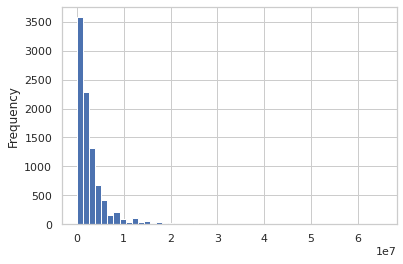

In [596]:
#Primeiro Histograma:
dados_vendas["Valor_anuncio_float"].plot.hist(bins = 50) #"bins" é quantidade de barras

Agora que temos este gráfico, é possivel verificar valores mínimos, máximos, média e mediana;

Explicação: O gráfico está "esticando" até o 7 porque há um imóvel de 65milhões.

In [597]:
dados_vendas.describe() #verificando valores.

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


A tabela está em notação cientifica, agora vamos converter para valores reais.

In [598]:
#Obtendo valores de média, mediana, max, min:

pd.set_option("display.precision", 2) #2 casas decimais de precisão
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [599]:
# Convertendo a tabela para o  tipo float:

pd.set_option("display.precision", 2)
pd.set_option("display.float_format", lambda x: "%.2f" % x)
dados_vendas.describe()

'''Aqui confirma que existe na tabela um imóvel de 65milhões o que pode
indicar que ele é um prédio ou um condomínio, ou ainda, pode ter sido preenchido errado.
Também mostra que o valor mínimo é 10m², estes pontos fora da curva devem ser observados.'''

'Aqui confirma que existe na tabela um imóvel de 65milhões o que pode\nindicar que ele é um prédio ou um condomínio, ou ainda, pode ter sido preenchido errado.\nTambém mostra que o valor mínimo é 10m², estes pontos fora da curva devem ser observados.'

In [600]:
#Utilizando o "include = all" para verificar  mais informações sobre a tabela:

pd.set_option("display.precision", 2)
pd.set_option("display.float_format", lambda x: "%.2f" % x)
dados_vendas.describe(include = "all")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float
count,6107,9146,9156,9156.00,9156.00,9156.00,9156.00,9156,9156,9156,0,9156.00
unique,3006,697,1,NaN,NaN,NaN,NaN,939,1,939,0,NaN
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000,R$,2.500.000,NaN,NaN
freq,24,369,9156,NaN,NaN,NaN,NaN,182,9156,182,NaN,NaN
mean,NaN,NaN,NaN,434.42,3.45,3.80,3.96,NaN,NaN,NaN,NaN,3052202.96
std,NaN,NaN,NaN,7856.42,1.05,1.97,2.60,NaN,NaN,NaN,NaN,3944208.19
min,NaN,NaN,NaN,10.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN,13000.00
25%,NaN,NaN,NaN,168.00,3.00,2.00,2.00,NaN,NaN,NaN,NaN,890000.00
50%,NaN,NaN,NaN,276.00,3.00,4.00,4.00,NaN,NaN,NaN,NaN,1800000.00
75%,NaN,NaN,NaN,450.00,4.00,5.00,5.00,NaN,NaN,NaN,NaN,3500000.00


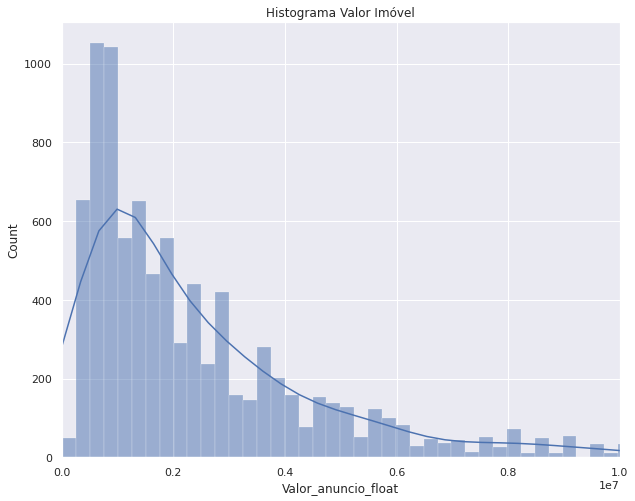

In [601]:
#Grafico para vizualização melhor dos dados (sem o imóvel de 65milhões):

sns.set() #estilo do gráfico
plt.figure(figsize=(10,8)) #configura o tamanho do gráfico.
ax = sns.histplot(data= dados_vendas, x = "Valor_anuncio_float", kde = True)
ax.set_title("Histograma Valor Imóvel")
plt.xlim((-50, 10000000))
plt.show()
#x é coluna, y é linha #kde é uma curva de aproximação

In [602]:
#Criando uma escala dos valores em milhões:

dados_vendas["Valor_em_milhoes"] = dados_vendas["Valor_anuncio_float"].apply(lambda x: x/1000000.0)
dados_vendas.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_em_milhoes
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,3.70
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,0.38
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,0.69
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,0.54


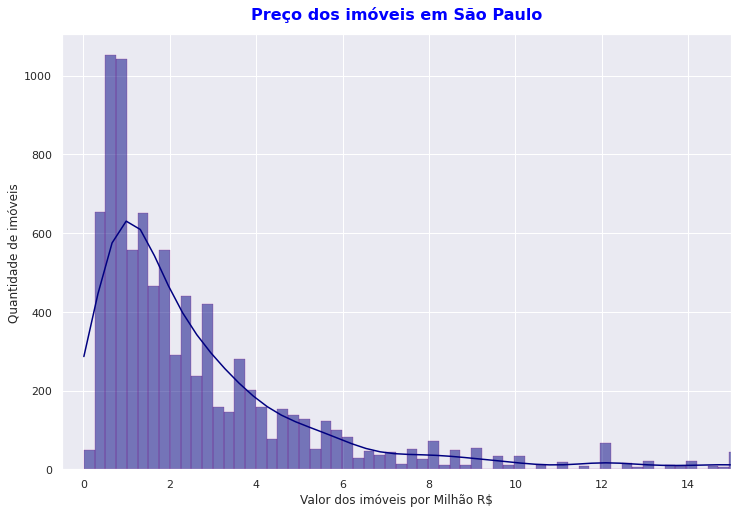

In [603]:
#Deixando o gráfico com valores legíveis (alterando as labels, eixos, escalas, cores, etc)

sns.set()
plt.figure(figsize=(12, 8))
ax = ax = sns.histplot(
    data = dados_vendas, 
    x = "Valor_em_milhoes",
    kde = True, 
    edgecolor = "purple",
    color = "navy")
ax.set_title("Preço dos imóveis em São Paulo", 
             fontsize=16,
             fontweight="bold",
             color="blue",
             pad=15)

ax.set(xlabel="Valor dos imóveis por Milhão R$", 
       ylabel="Quantidade de imóveis")

plt.xlim(-0.5, 15)
plt.show()

In [604]:
#Criando a serie com o valor por m2 ["Valor_m2"]:

dados_vendas["Valor_m2"] = dados_vendas["Valor_anuncio_float"]/dados_vendas["Metragem"].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [605]:
#Agrupando por bairro, criando um novo dataframe
Bairro_m2 = pd.DataFrame(dados_vendas.groupby("Bairro")["Valor_m2"].sum())
Bairro_m2

,Valor_m2
Bairro,
Aclimação,604837.39
Alto da Boa Vista,46796.55
Alto da Lapa,608538.25
Alto da Mooca,113834.80
Alto de Pinheiros,4158622.61
...,...
Vila Água Funda,22335.64
Água Branca,87229.37
Água Fria,70093.25


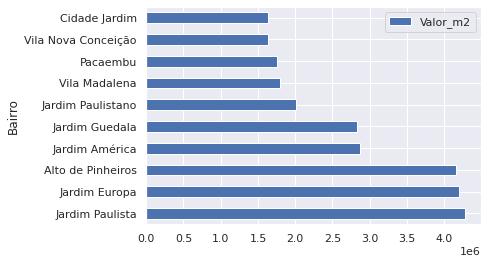

In [606]:
#Criando o gráfico simples com os 10 bairros cujo valor do m2 ficou mais alto:
Bairro_m2.sort_values(by = "Valor_m2", ascending= False)[:10].plot(kind='barh')

In [607]:
#Criando um índice pro df
Bairro_m2=Bairro_m2.reset_index()

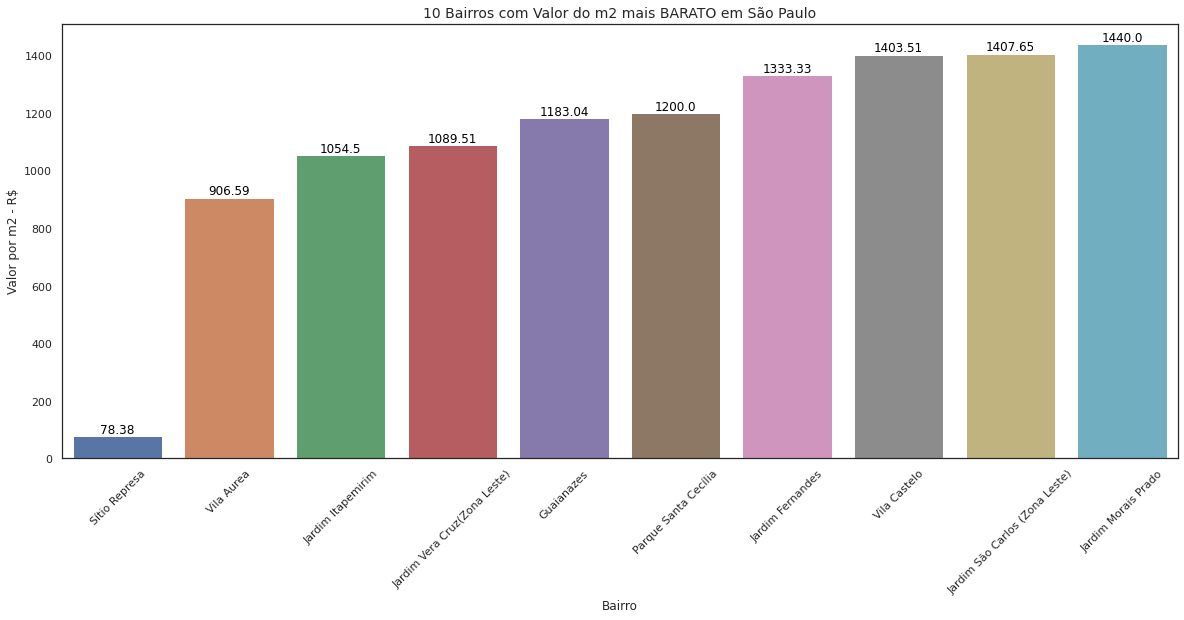

In [608]:
#Explorando outras bibliotecas de vizualização (Neste, recebi ajuda dos colegas da imersão com conhecimento mais aprofundado do que o  meu)

#Explorando outras formas de visualização com a biblioteca seaborn
plt.figure(figsize=(20, 8))
sns.set_style('white')
ax3 = sns.barplot(data=(Bairro_m2.sort_values(by = "Valor_m2", ascending=True)[:10]), x= "Bairro", y="Valor_m2", )

# Trecho de código extraído (e adaptado) do Canal 'Programe Python' https://www.youtube.com/watch?v=QFaBMdfMrKI
for i in ax3.patches:
    ax3.annotate((round(i.get_height(),2)),
                 (i.get_x() + i.get_width() / 2, i.get_height()),
                 ha='center', va='baseline', color='black', xytext=(0,3),
                 textcoords='offset points')
###########    
ax3.set_xlabel("Bairro", fontsize ="12")
ax3.set_ylabel("Valor por m2 - R$")
ax3.set_title("10 Bairros com Valor do m2 mais BARATO em São Paulo", fontsize='14')
plt.xticks(rotation=45)

plt.show()


Explicação do gráfico: Há uma diferença do primeiro bairro (Sítio Represa) para o segundo (Vila Aurea) porque o primeiro se trata de um bairro de zona rural, nestes, em extensões muito grandes o valor do m2 é menor.

Pesquisar uma visualização para mostrar os quartis, mediana e outliers:

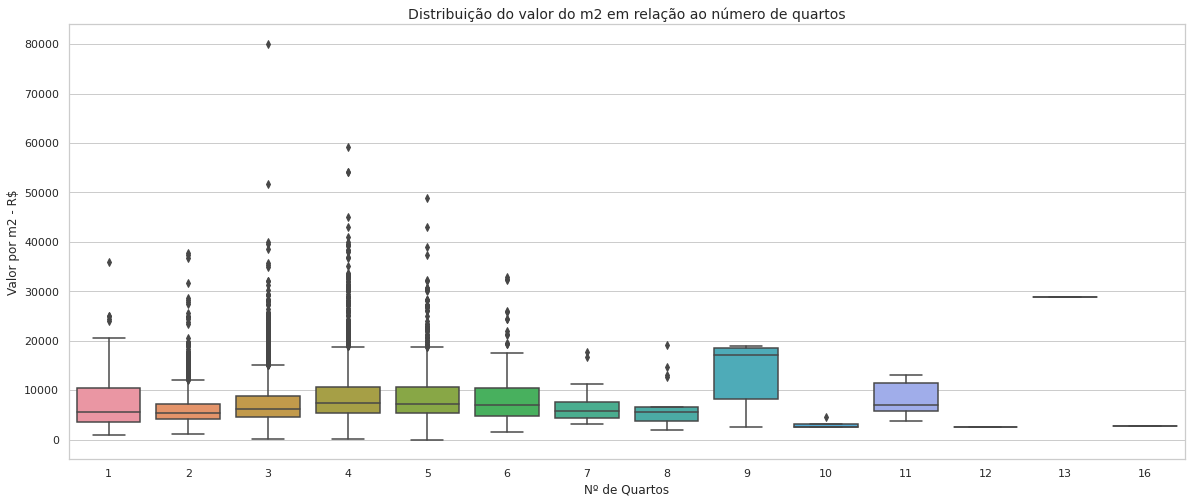

In [609]:
plt.figure(figsize=(20, 8))
sns.set_theme(style="whitegrid")
ax4 = sns.boxplot( y='Valor_m2', x= 'Quartos', data= dados_vendas)
ax4.set_xlabel("Nº de Quartos", fontsize ="12")
ax4.set_ylabel("Valor por m2 - R$")
ax4.set_title("Distribuição do valor do m2 em relação ao número de quartos", fontsize='14')
plt.show()

#GRÁFICOS, TIME SERIES E ANÁLISE EXPLORATÓRIA

In [610]:
#Agrupamos os dados para melhor vizualização do m2 dos imóveis e para tirar a média do valor do m2:
dados_vendas.groupby("Bairro").mean()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_em_milhoes,Valor_m2
Bairro,,,,,,,
Aclimação,246.16,3.27,3.04,2.91,1763200.01,1.76,7656.17
Alto da Boa Vista,418.88,4.12,5.12,4.62,2391250.00,2.39,5849.57
Alto da Lapa,299.25,3.15,3.85,4.00,2083168.75,2.08,7606.73
Alto da Mooca,270.05,3.30,2.60,3.65,1184170.00,1.18,5691.74
Alto de Pinheiros,429.85,3.94,4.83,4.95,4782698.96,4.78,11269.98
...,...,...,...,...,...,...,...
Vila Água Funda,152.20,2.60,2.20,2.60,652000.00,0.65,4467.13
Água Branca,173.58,3.08,3.25,2.25,1226500.00,1.23,7269.11
Água Fria,165.42,2.83,3.42,2.50,927083.33,0.93,5841.10


Problema: um bairro tem um imóvel gigantesco custando 65milhões e outro pequeno em torno de 200mil reais. E o custo médio deste bairro acaba ficando muito alto.

O valor está discrepante por que foi preenchido errado? Ou ele custa isso mesmo? - Questões que precisam ser respondidas.

Uma dica é verificar como é feito o valor do m² na cidade (conversar com especialista) ou tirar a media das medias para ter um comparativo.

Acima, foi calculado o valor da media dos imóveis. Agora vamos calcular o valor da média dos imóveis por bairro. (afunilando mais ainda)

In [611]:
dado_bairro = dados_vendas.groupby("Bairro").sum() #Agrupando os bairros para posteriormente calcular a media.
dado_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_em_milhoes,Valor_m2
Bairro,,,,,,,
Aclimação,19447,258,240,230,139292801.00,139.29,604837.39
Alto da Boa Vista,3351,33,41,37,19130000.00,19.13,46796.55
Alto da Lapa,23940,252,308,320,166653500.00,166.65,608538.25
Alto da Mooca,5401,66,52,73,23683400.00,23.68,113834.80
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,1764.82,4158622.61
...,...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.00,3.26,22335.64
Água Branca,2083,37,39,27,14718000.00,14.72,87229.37
Água Fria,1985,34,41,30,11125000.00,11.12,70093.25


In [612]:
#media do valor do m2 por bairro:
dado_bairro["Valor_m2_bairro"] = dado_bairro["Valor_anuncio_float"]/dado_bairro["Metragem"]
dado_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_em_milhoes,Valor_m2,Valor_m2_bairro
Bairro,,,,,,,,
Aclimação,19447,258,240,230,139292801.00,139.29,604837.39,7162.69
Alto da Boa Vista,3351,33,41,37,19130000.00,19.13,46796.55,5708.74
Alto da Lapa,23940,252,308,320,166653500.00,166.65,608538.25,6961.30
Alto da Mooca,5401,66,52,73,23683400.00,23.68,113834.80,4385.00
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,1764.82,4158622.61,11126.34
...,...,...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.00,3.26,22335.64,4283.84
Água Branca,2083,37,39,27,14718000.00,14.72,87229.37,7065.77
Água Fria,1985,34,41,30,11125000.00,11.12,70093.25,5604.53


In [613]:
#Para fazer um comparativo, agora vamos ver a media do valor do m2 total dos bairros de são paulo (mesma coisa que fizemos na célula 45)

dados_vendas.groupby("Bairro").mean()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_em_milhoes,Valor_m2
Bairro,,,,,,,
Aclimação,246.16,3.27,3.04,2.91,1763200.01,1.76,7656.17
Alto da Boa Vista,418.88,4.12,5.12,4.62,2391250.00,2.39,5849.57
Alto da Lapa,299.25,3.15,3.85,4.00,2083168.75,2.08,7606.73
Alto da Mooca,270.05,3.30,2.60,3.65,1184170.00,1.18,5691.74
Alto de Pinheiros,429.85,3.94,4.83,4.95,4782698.96,4.78,11269.98
...,...,...,...,...,...,...,...
Vila Água Funda,152.20,2.60,2.20,2.60,652000.00,0.65,4467.13
Água Branca,173.58,3.08,3.25,2.25,1226500.00,1.23,7269.11
Água Fria,165.42,2.83,3.42,2.50,927083.33,0.93,5841.10


Para melhorar a vizualização dos dados, vamos plotar um gráfico. Só que são mais de 600 bairros, logo vamos ter que filtrar os 10 bairros mais frequentes para serem exibidos.

No código a seguir é possível selecionar os 10 bairros com mais anúncios da lista.

In [614]:
#Selecionando os 10 bairros com maior número de anúncios de vendas:

top_bairros = dados_vendas["Bairro"].value_counts()[:10].index
top_bairros

Index(['Alto de Pinheiros', 'Jardim Guedala', 'Jardim Paulista',
       'Brooklin Paulista', 'Jardim Europa', 'Pacaembu', 'Vila Madalena',
       'Cidade Jardim', 'Planalto Paulista', 'Jardim Leonor'],
      dtype='object')

In [615]:
#lembrando q o bairro é index e não é uma coluna, então vamos ter arrumar isso.
#transformando o bairro em coluna no código seguinte (resetando o index):
dado_bairro.reset_index(inplace = True)
dado_bairro

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_em_milhoes,Valor_m2,Valor_m2_bairro
0,Aclimação,19447,258,240,230,139292801.00,139.29,604837.39,7162.69
1,Alto da Boa Vista,3351,33,41,37,19130000.00,19.13,46796.55,5708.74
2,Alto da Lapa,23940,252,308,320,166653500.00,166.65,608538.25,6961.30
3,Alto da Mooca,5401,66,52,73,23683400.00,23.68,113834.80,4385.00
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,1764.82,4158622.61,11126.34
...,...,...,...,...,...,...,...,...,...
692,Vila Água Funda,761,13,11,13,3260000.00,3.26,22335.64,4283.84
693,Água Branca,2083,37,39,27,14718000.00,14.72,87229.37,7065.77
694,Água Fria,1985,34,41,30,11125000.00,11.12,70093.25,5604.53
695,Água Funda,278,6,5,4,1090000.00,1.09,7753.73,3920.86


In [616]:
#Agora, vou selecionar apenas as linhas dos 10 bairros selecionados anteriormente para poder gerar o gráfico:

dado_bairro.query("Bairro in @top_bairros")

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_em_milhoes,Valor_m2,Valor_m2_bairro
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,1764.82,4158622.61,11126.34
19,Brooklin Paulista,70002,778,862,832,475796789.00,475.80,1627341.87,6796.90
57,Cidade Jardim,132220,789,1008,1172,1164210900.00,1164.21,1635692.98,8805.10
155,Jardim Europa,118898,795,993,1056,2414172900.00,2414.17,4192164.45,20304.57
168,Jardim Guedala,972212,1443,2027,2161,1801165587.00,1801.17,2833882.79,1852.65
187,Jardim Leonor,97141,697,941,902,646326369.00,646.33,1115858.80,6653.49
227,Jardim Paulista,130283,1028,1231,1171,2136081000.00,2136.08,4279262.19,16395.70
338,Pacaembu,100285,774,889,1028,867956500.00,867.96,1753672.28,8654.90
396,Planalto Paulista,59250,636,768,713,374907000.00,374.91,1186380.95,6327.54
564,Vila Madalena,66250,739,786,712,583253030.00,583.25,1792770.40,8803.82


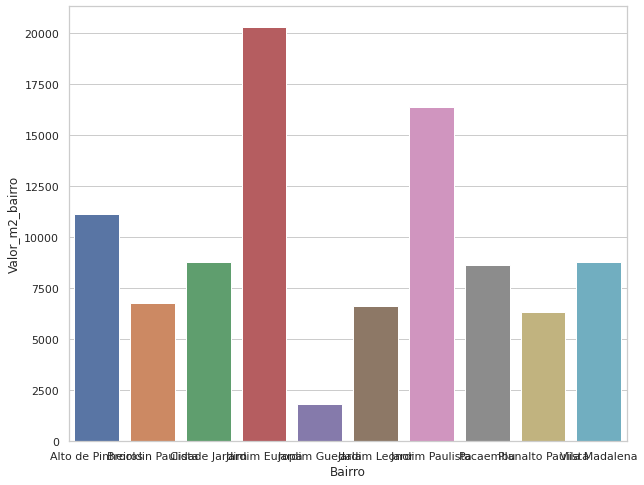

In [617]:
#seguindo para a criação do gráfico
# x = coluna / y = linha

plt.figure(figsize=(10,8))
ax = sns.barplot(x="Bairro", y="Valor_m2_bairro", data=dado_bairro.query("Bairro in @top_bairros"))

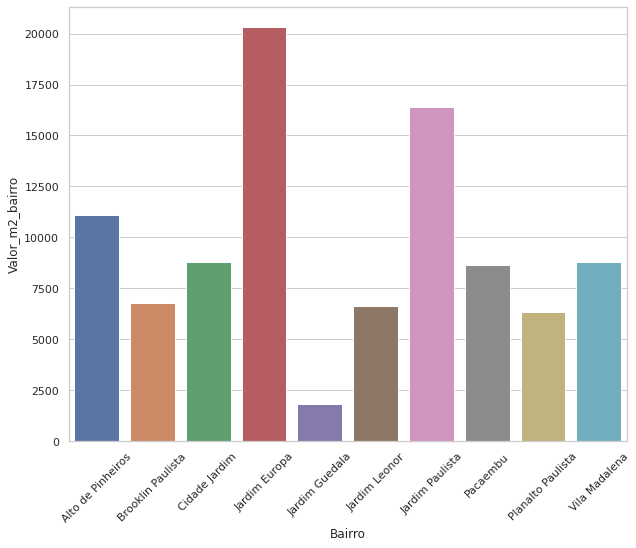

In [618]:
#Agora, vamos rotacionar os nomes dos bairros para ficarem legíveis usando tick_params.

plt.figure(figsize=(10,8))
ax = sns.barplot(x="Bairro", y="Valor_m2_bairro", data=dado_bairro.query("Bairro in @top_bairros"))
ax.tick_params(axis='x', rotation=45)

Agora, queremos saber porque o bairro Jardim Europa tem o maior valor do m2, enquanto o Jardim Guedala, o menor.

Para isso, vamos começar plotando outro gráfico (o boxplot) para obtermos mais respostas.

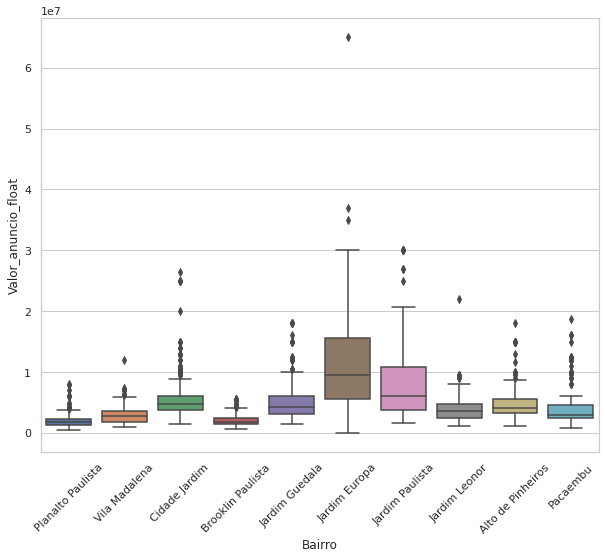

In [619]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros"), x="Bairro", y="Valor_anuncio_float")
ax.tick_params(axis='x', rotation=45)
plt.show()

O Jardim Europa, possui um único imóvel custando mais de 65milhões e isto pode estar influenciando no valor total do m² do bairro.

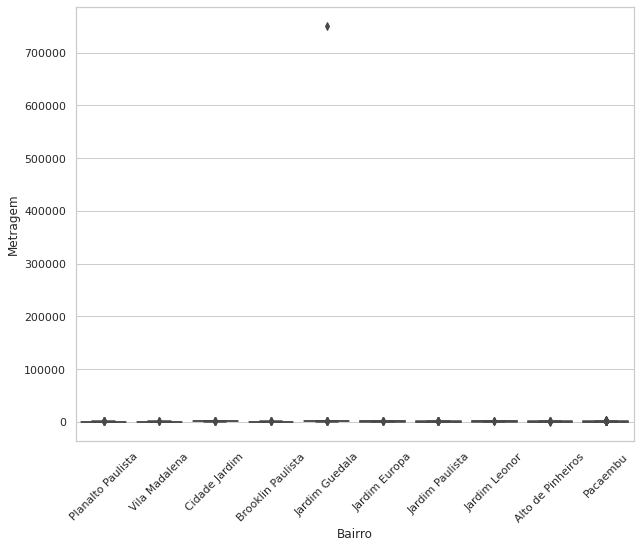

In [620]:
#Agora, vamos comparar com um gráfico da metragem dos imóveis:

plt.figure(figsize=(10,8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros"), x="Bairro", y="Metragem")
ax.tick_params(axis='x', rotation=45)
plt.show()

Neste último gráfico, é possível verificar um imóvel no Jardim Guedala acima dos 700.000m².

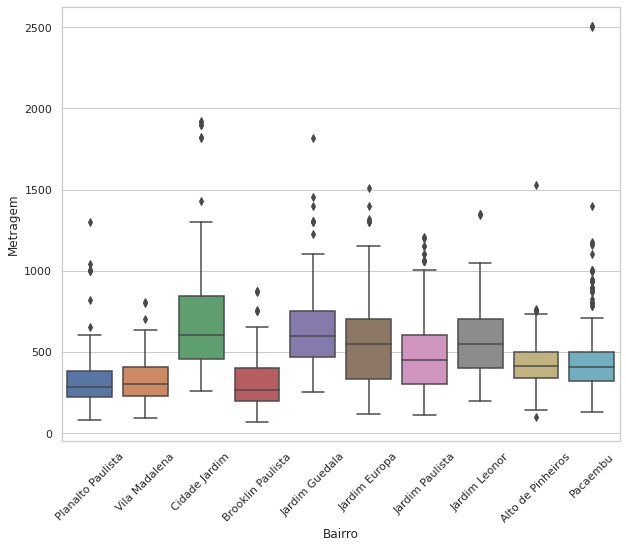

In [621]:
#Reduzindo a metragem para chegarmos em um gráfico de possível leitura.
#A metragem foi limitada em < 300.000m²

plt.figure(figsize=(10,8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros & Metragem < 300000"), x="Bairro", y="Metragem")
ax.tick_params(axis='x', rotation=45)
plt.show()

#CRUZANDO BASE DE DADOS

In [622]:
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_em_milhoes,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,3.70,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,0.38,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,0.69,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,0.54,5400.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.00,1.50,5617.98
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.00,0.67,7000.00
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.00,2.30,3801.65
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.00,1.05,5121.95


In [623]:
#Inserindo a base de dados do IBGE SENSO 2010:
ibge_url = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"
pd.read_csv(ibge_url)

,,,,,,,,,,Cod_setor;Cod_Grandes Regi�es;Nome_Grande_Regiao;Cod_UF;Nome_da_UF ;Cod_meso;Nome_da_meso;Cod_micro;Nome_da_micro;Cod_RM;Nome_da_RM;Cod_municipio;Nome_do_municipio;Cod_distrito;Nome_do_distrito;Cod_subdistrito;Nome_do_subdistrito;Cod_bairro;Nome_do_bairro;Situacao_setor;Tipo_setor;V001;V002;V003;V004;V005;V006;V007;V008;V009;V010;V011;V012;
"355030801000001;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;266;800;3",01;2,32;2091,32;8532451,78;2164,55;8673276,78;1227,41;4285771,99;1713,75;5152087,86.00
"355030801000002;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;306;913;2",98;2,09;1650,09;3983441,31;1717,44;4030519,99;1045,78;2572133,32;1468,08;2991546,94.00
"355030801000003;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;189;625;3",31;3,08;1280,43;5474593,06;2349,53;7553913,02;902,97;2735492,52;1786,79;3837674,74.00
"355030801000004;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;181;572;3",16;2,26;1119,59;3572955,1;1859,13;4567289,5;869,09;2122409,02;1567,41;2735383,24.00
"355030801000005;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;240;754;3",14;2,35;1416,9;2240207,58;1581,66;2240109,39;917,71;1570047,75;1356,35;1725877,85.00
...,...,...,...,...,...,...,...,...,...,...
"355030896000243;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030896;""LAJEADO"";35503089600;""LAJEADO"";3550308000;""S�O PAULO (todos os setores)"";1;1;96;336;3",5;2,61;772,09;168751,1;814,52;143188,21;467,46;191332,48;699,95;123399,8.00
"355030896000244;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030896;""LAJEADO"";35503089600;""LAJEADO"";3550308000;""S�O PAULO (todos os setores)"";1;1;54;209;3",87;2,49;692,5;239941,27;812,93;182516,2;439,33;194034,99;702,1;124952,38.00
"355030896000245;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030896;""LAJEADO"";35503089600;""LAJEADO"";3550308000;""S�O PAULO (todos os setores)"";1;1;87;339;3",9;2,54;630,06;329705,22;843,31;260395,9;347,6;228162,66;767,5;181129,99.00
"355030896000246;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030896;""LAJEADO"";35503089600;""LAJEADO"";3550308000;""S�O PAULO (todos os setores)"";1;0;38;163;4",29;4,21;597,37;349101;908;244391,67;397,76;436942,16;854,2;550319,43,NaN,NaN


In [624]:
#Limpando a tabela que obtivemos acima para melhorar a visualização:
ibge_sp = pd.read_csv(
    'https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv',
    encoding='ISO-8859-1',
    sep=';', thousands='.', decimal=','
)
ibge_sp.dropna(how='all', axis=1, inplace=True)
ibge_sp.head()

,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


Na tabela acima é possível ver várias informações, dentre elas, o cod_setor. Que é o **setor censitário**.

**Setor Censitário** é a menor unidade territorial para a qual o IBGE divulga informações – e é a menor divisão territorial disponível no OnMaps. É formada por área contínua, integralmente em região urbana ou rural. Os setores censitários são definidos pelo IBGE a cada Censo para o controle da coleta de dados da população.

É este código que vamos utilizar para fazer o cruzamento das informações com os dados que tratamos na primeira parte deste trabalho. Primeiro, vamos pegar a latitude e longitude de cada setor censitário a fim de localizá-los.

Para acessar o dicionário de dados do IBGE trabalhado neste projeto é só [clicar aqui](https://drive.google.com/file/d/1WVTqfKtHOOk5X1AWaSOn6NLaO7cix2m4/view).

Nas informações abaixo, os "V001, V002, V003..." são as perguntas relacionadas a esta base de dados. Pelo link acima é possível ver quais são elas.

In [625]:
ibge_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cod_setor              18363 non-null  int64  
 1   Cod_Grandes Regiï¿½es  18363 non-null  int64  
 2   Nome_Grande_Regiao     18363 non-null  object 
 3   Cod_UF                 18363 non-null  int64  
 4   Nome_da_UF             18363 non-null  object 
 5   Cod_meso               18363 non-null  int64  
 6   Nome_da_meso           18363 non-null  object 
 7   Cod_micro              18363 non-null  int64  
 8   Nome_da_micro          18363 non-null  object 
 9   Cod_RM                 18363 non-null  int64  
 10  Nome_da_RM             18363 non-null  object 
 11  Cod_municipio          18363 non-null  int64  
 12  Nome_do_municipio      18363 non-null  object 
 13  Cod_distrito           18363 non-null  int64  
 14  Nome_do_distrito       18363 non-null  object 
 15  Co

In [626]:
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_em_milhoes,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,3.70,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,0.38,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,0.69,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,0.54,5400.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.00,1.50,5617.98
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.00,0.67,7000.00
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.00,2.30,3801.65
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.00,1.05,5121.95


Para identificar a latitude e longitude (localização) de cada setor censitário, vamos utilizar mais uma base de dados do [CEP Aberto](https://https://cepaberto.com/).

In [627]:
#Acrescentando a terceira base de dados de CEP para ser possível vincular a nossa primeira base de dados com a segunda.

enderecos = pd.read_csv("/content/drive/MyDrive/enderecos.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [628]:
#Mostrando os dados que temos na base de dados de enderecos.

enderecos.head()

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
0,Rua,Armando Silveira,Rua Armando Silveira,NaN,Divisa,Santana do Livramento,RS,97573200.00,-30.88,-55.55
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
2,Rua,Prefeito Agenor Barcelos Feio,Rua Prefeito Agenor Barcelos Feio,NaN,Registro,Santana do Livramento,RS,97571090.00,-30.86,-55.56
3,Rua,Sebastião Gomes,Rua Sebastião Gomes - até 59/60,59,Registro,Santana do Livramento,RS,97571374.00,-30.86,-55.55
4,Rua,Marquês do Alegrete,Rua Marquês do Alegrete,NaN,Parque das Águas,Santana do Livramento,RS,97571500.00,-30.86,-55.55


In [629]:
#Filtrando somente os endereços de SÃO Paulo:

enderecos_sp = enderecos.query("sigla_uf == 'SP'")
enderecos_sp

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35
...,...,...,...,...,...,...,...,...,...,...
1113858,Rua,Daniel Buccieri,Rua Daniel Buccieri,NaN,Jardim Alvorada,Monte Mor,SP,13198524.00,-22.93,-47.27
1113865,Rua,Ottorino Rizzi,Rua Ottorino Rizzi,NaN,Royal Park,Ribeirão Preto,SP,14028563.00,-21.24,-47.83
1113873,Rua,Adriano Michelutti Cândia,Rua Adriano Michelutti Cândia,NaN,Jardim San Marco II,Ribeirão Preto,SP,14035198.00,-21.20,-47.74
1113882,Rodovia,Mario Tonolli,Rodovia Mario Tonolli,NaN,Morro Alto,Itupeva,SP,13297002.00,-23.19,-47.08


In [630]:
#Limpando os dados de logradouros da coluna acima, mudando o nome da coluna para "rua", limpando espaços:

enderecos_sp ["rua"]= enderecos_sp["tipo_logr"]+" " + enderecos_sp["logr_nome"]
enderecos_sp ["rua"]= enderecos_sp["rua"].str.lower().str.strip()
enderecos_sp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude,rua
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45,rua joão antônio vasconcelos
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34,rua a
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35,rua a
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33,rua a
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35,rua joão bandini


In [631]:
#Removendo caracteres especiais e filtrando somente o nome da rua do imóvel:

dados_vendas["Rua"].str.extract(r'(^[\w ]+)')[:10]

,0
0,Avenida Itacira
1,Rua Aurelia Perez Alvarez
2,Rua Alba Valdez
3,NaN
4,Rua Tobias Barreto
5,Rua Graham Bell
6,Rua Francisco Paulo
7,Rua Guilherme Valente
8,Rua Sagrada Família
9,Rua Tapaji


In [632]:
dados_vendas["Rua"].str.extract(r'(^[\w ]+)')
dados_vendas.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_em_milhoes,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,3.70,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,0.38,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,0.69,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,0.54,5400.00


In [633]:
dados_vendas["apenas_rua"] = dados_vendas["Rua"].str.extract(r'(^[\w ]+)') #limpando o que está após a vírgula no nome da rua.
dados_vendas["apenas_rua"] = dados_vendas["apenas_rua"].str.lower().str.strip() #passando tudo pra minúsculo e excluindo espaços extras.
dados_vendas.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_em_milhoes,Valor_m2,apenas_rua
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7.00,7000.00,avenida itacira
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,3.70,7459.68,rua aurelia perez alvarez
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,0.38,3040.00,rua alba valdez
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,0.69,2209.68,NaN
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,0.54,5400.00,rua tobias barreto


In [634]:
#Combinando a base de dados "dados_vendas" com a base de dados "enderecos_sp" - e removendo linhas duplicadas:

dados_geo = pd.merge(left=dados_vendas, right=enderecos_sp[["rua", "cep", "latitude", "longitude"]], how="left", left_on = "apenas_rua", right_on = "rua").drop_duplicates(subset=dados_vendas.columns).query("cep > 0")
dados_geo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_em_milhoes,Valor_m2,apenas_rua,rua,cep,latitude,longitude
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7.00,7000.00,avenida itacira,avenida itacira,11443160.00,-23.98,-46.20
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,3.70,7459.68,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.00,-23.64,-46.69
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,0.38,3040.00,rua alba valdez,rua alba valdez,4845200.00,-23.75,-46.70
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,0.69,2209.68,NaN,NaN,18125000.00,-23.53,-47.26
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,0.54,5400.00,rua tobias barreto,rua tobias barreto,13474663.00,-22.70,-47.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89956,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.00,1.50,5617.98,avenida odila,avenida odila,4058020.00,-23.61,-46.65
89958,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.00,0.67,7000.00,rua tapuçu,rua tapuçu,4671185.00,-23.66,-46.69
89959,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.00,2.30,3801.65,rua guararema,rua guararema,13030640.00,-22.92,-47.08
89976,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.00,1.05,5121.95,rua estero belaco,rua estero belaco,4145020.00,-23.62,-46.63


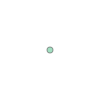

In [635]:
#Próximo passo, é vincular a latitude e longitude que aparecem na tabela acima com o código setor censitário da base de dados do IBGE.
#Vamos importar uma biblioteca de ponto.

from shapely.geometry import Point
latitude = -23.56
longitude = -46.59
Point(longitude,latitude)

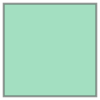

In [636]:
#Importando uma biblioteca de espaço:
from shapely.geometry import Polygon
Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

In [637]:
#Verificando se a localização está dentro da superfície criada:
Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]]).contains(Point(0.1,0.9))

True

Agora, vamos definir o cetor censitário como Polygon (quadrado de espaço) - como no exemplo acima - para identificar se o ponto específico do endereço está contido dentro da região do setor censitário.

Agora precisamos da biblioteca geopandas que é específica para trabalhar com dados de geoprocessamento.

##Instalando a biblioteca **GEOPANDAS**

In [638]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##IMPORTANDO a biblioteca GEOPANDAS

In [639]:
import geopandas as gpd

In [640]:
setor_censo = gpd.read_file('/content/drive/MyDrive/sp_setores_censitarios/35SEE250GC_SIR.shp')
setor_censo.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.00,354100005000009,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.00,354100005000004,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,98230.00,354100005000002,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."
3,98229.00,354100005000001,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,4,"POLYGON ((-46.41134 -24.00552, -46.41196 -24.0..."
4,98231.00,354100005000003,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,5,"POLYGON ((-46.41326 -24.00514, -46.41484 -24.0..."


In [643]:
#Verificando se uma localização está dentro do setor censitário:

setor_censo_sp = setor_censo[setor_censo.NM_MUNICIP == "SÃO PAULO"]
setor_censo_sp[setor_censo_sp.contains(Point(-46.63, -23.58))]

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
60986,126568.00,355030890000080,URBANO,35503089000,None,355030890,VILA MARIANA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,60987,"POLYGON ((-46.62618 -23.58169, -46.62863 -23.5..."


In [644]:
dados_geo["Point"] = ""
for i in dados_geo.index:
    dados_geo["Point"][i] = Point(dados_geo["longitude"][i], dados_geo["latitude"][i])

dados_geo['setor_censo'] = dados_geo["Point"][:10].map(
    lambda x: setor_censo_sp.loc[setor_censo_sp.contains(x), 'CD_GEOCODI'].values
).str[0]
dados_geo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,...,Valor_anuncio_float,Valor_em_milhoes,Valor_m2,apenas_rua,rua,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,...,7000000.00,7.00,7000.00,avenida itacira,avenida itacira,11443160.00,-23.98,-46.20,POINT (-46.2013172 -23.975993),NaN
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,...,3700000.00,3.70,7459.68,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,...,380000.00,0.38,3040.00,rua alba valdez,rua alba valdez,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,...,685000.00,0.69,2209.68,NaN,NaN,18125000.00,-23.53,-47.26,POINT (-47.2550228 -23.5310431),NaN
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,...,540000.00,0.54,5400.00,rua tobias barreto,rua tobias barreto,13474663.00,-22.70,-47.29,POINT (-47.2944609 -22.6989009),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89956,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,...,1500000.00,1.50,5617.98,avenida odila,avenida odila,4058020.00,-23.61,-46.65,POINT (-46.6472577 -23.6090928),NaN
89958,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,...,665000.00,0.67,7000.00,rua tapuçu,rua tapuçu,4671185.00,-23.66,-46.69,POINT (-46.6915206 -23.661018),NaN
89959,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,...,2300000.00,2.30,3801.65,rua guararema,rua guararema,13030640.00,-22.92,-47.08,POINT (-47.0769595 -22.9227492),NaN
89976,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,...,1050000.00,1.05,5121.95,rua estero belaco,rua estero belaco,4145020.00,-23.62,-46.63,POINT (-46.632983 -23.6161237),NaN


In [645]:
#Agora temos os endereços com os códigos do setor censitário para dar continuidade:
dados_geo = pd.read_csv("/content/drive/MyDrive/dados_geo.csv")
dados_geo.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,Valor_mm,Valor_m2,rua,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.00,NaN,7.00,7000.00,Avenida Itacira,4061000.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),355030877000067.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.00,NaN,3.70,7459.68,Rua Aurelia Perez Alvarez,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.00,NaN,0.38,3040.00,Rua Alba Valdez,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050.00
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.00,NaN,0.54,5400.00,Rua Tobias Barreto,3176000.00,-23.55,-46.59,POINT (-46.5881729 -23.5499597),355030808000050.00
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.00,NaN,1.98,4500.00,Rua Graham Bell,4737030.00,-23.59,-46.76,POINT (-46.7600773 -23.5937964),355030865000169.00


In [646]:
#Agora temos a base de dados vinculada com o censo do IBGE:
dados_vendas_censo = pd.merge(left = dados_geo, right = ibge_sp, how = "left", left_on = "setor_censo", right_on = "Cod_setor")
dados_vendas_censo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.00,NaN,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.00,NaN,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.00,NaN,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.00,NaN,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.00,NaN,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,1500000.00,NaN,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,665000.00,NaN,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5602,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,2300000.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,1050000.00,NaN,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


In [647]:
dados_vendas_censo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5605 entries, 0 to 5604
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rua                    5605 non-null   object 
 1   Bairro                 5597 non-null   object 
 2   Cidade                 5605 non-null   object 
 3   Metragem               5605 non-null   int64  
 4   Quartos                5605 non-null   int64  
 5   Banheiros              5605 non-null   int64  
 6   Vagas                  5605 non-null   int64  
 7   Valor                  5605 non-null   object 
 8   Valor_anuncio          5605 non-null   float64
 9   Tipo_anuncio           0 non-null      float64
 10  Valor_mm               5605 non-null   float64
 11  Valor_m2               5605 non-null   float64
 12  rua                    5605 non-null   object 
 13  cep                    5605 non-null   float64
 14  latitude               5605 non-null   float64
 15  long

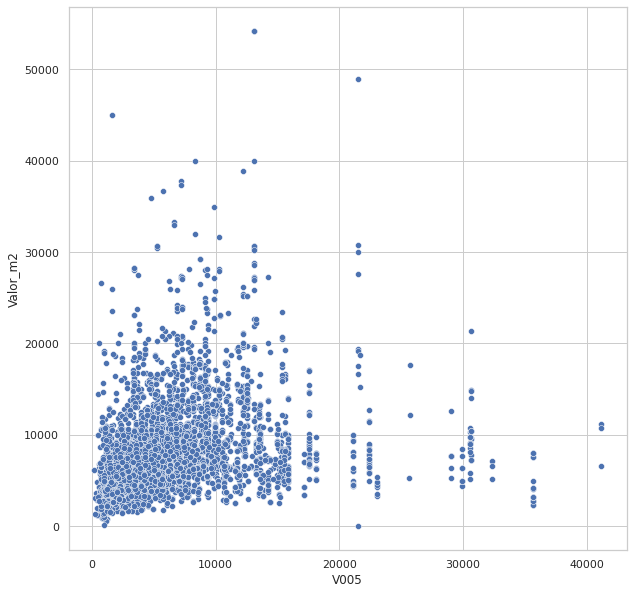

In [648]:
#Plotando um gráfico:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = dados_vendas_censo, x="V005", y="Valor_m2")

#MACHINE LEARNING

##Criando um modelo de machine learning para predição do valor dos imóveis

In [651]:
#A equipe da imersão melhorou a limpeza dos dados acima e encaminharam o link que vamos adicionar aqui:
#Vinculando a base do censo com a base original - selecionando apenas as colunas interessantes para a análise:
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set()

dados_vendas_censo = pd.read_csv("/content/drive/MyDrive/dados_vendas_censo.csv")
dados_vendas_censo = dados_vendas_censo[['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor_anuncio', 'Valor_mm', 'Valor_m2', 'latitude', 'longitude', 'Situacao_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012']].dropna()
dados_vendas_censo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00,7000.00,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70,7459.68,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,0.38,3040.00,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,0.54,5400.00,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,1.98,4500.00,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,960000.00,0.96,6114.65,...,2.17,1.27,5054.58,33245189.73,5231.93,33485189.78,3649.06,26562232.53,4551.66,29032823.35
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.00,1.50,5617.98,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.00,0.67,7000.00,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.00,1.05,5121.95,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


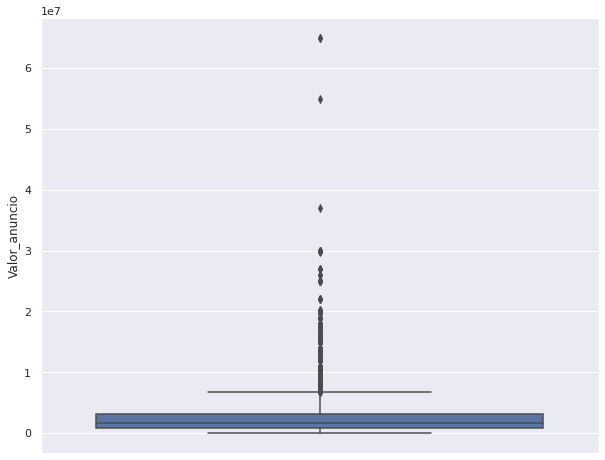

In [652]:
#Plotando um gráfico com as informações acima:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas_censo, y="Valor_anuncio")
plt.show()

Com o gráfico acima podemos observar que existem valores bem discrepantes. Para uma melhor vizualização, vamos limitar os valores dos imóveis que aparecem no gráfico.

In [653]:
dados_vendas_censo.query("Valor_anuncio > 30000000 | Valor_anuncio < 100000")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
54,Rua Inglaterra,Jardim Europa,São Paulo,200,3,3,2,13000.00,0.01,65.00,...,3.13,2.87,21545.71,1577883376.43,26081.65,1794039881.36,11050.67,882338714.47,15470.93,1168079134.43
89,Rua Inglaterra,Jardim Europa,São Paulo,756,5,4,10,37000000.00,37.00,48941.80,...,3.13,2.87,21545.71,1577883376.43,26081.65,1794039881.36,11050.67,882338714.47,15470.93,1168079134.43
1032,Praça Nicolau Scarpa,Jardim América,São Paulo,1200,4,4,25,65000000.00,65.00,54166.67,...,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57
3521,Rua Estados Unidos,Jardim América,São Paulo,1816,4,10,20,55000000.00,55.00,30286.34,...,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57
3896,Rua Estados Unidos,Jardim América,São Paulo,1200,4,6,24,65000000.00,65.00,54166.67,...,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57


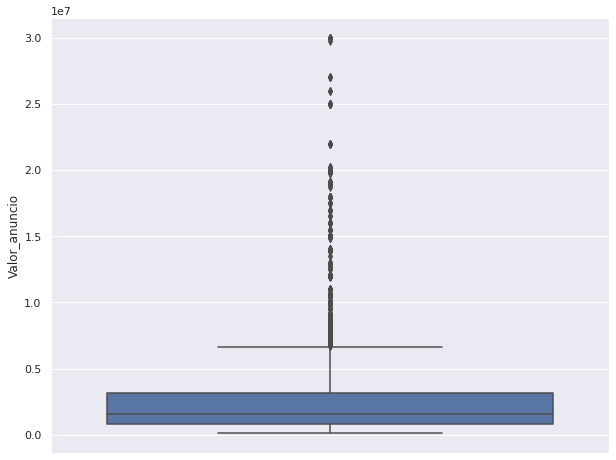

In [654]:
#Plotando novamente o gráfico com os limites de valores inseridos acima:
dados_vendas_censo.drop(dados_vendas_censo.query("Valor_anuncio > 30000000 | Valor_anuncio < 100000").index, inplace = True)
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas_censo, y="Valor_anuncio")
plt.show()

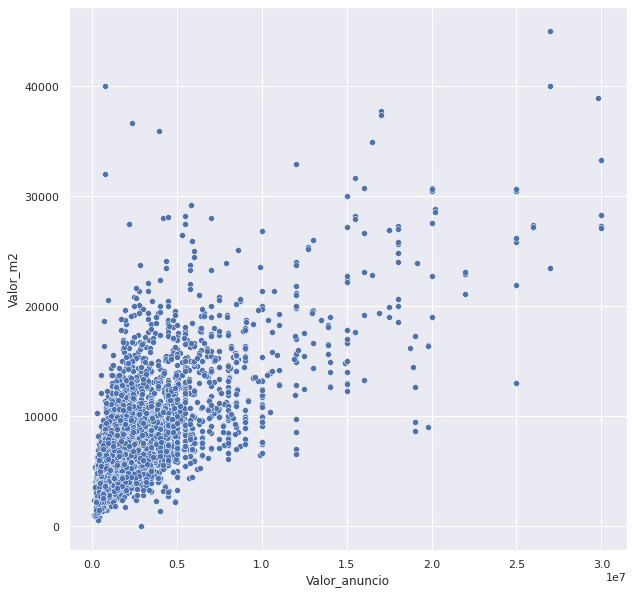

In [655]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = dados_vendas_censo, x="Valor_anuncio", y="Valor_m2")

O gráfico não mostra uma linha contínua pois há valores muitos discrepantes de imóveis tanto de metragem quanto de valor de anúncio.

In [656]:
#Calculando a correlação de todas as variáveis:
dados_vendas_censo.corr()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,latitude,longitude,Situacao_setor,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
Metragem,1.00,0.23,0.23,0.27,0.30,0.30,0.06,-0.09,-0.13,0.48,...,0.13,0.05,0.22,0.07,0.23,0.05,0.20,0.07,0.21,0.05
Quartos,0.23,1.00,0.55,0.42,0.37,0.37,0.12,-0.01,-0.19,-0.01,...,0.16,0.07,0.32,0.12,0.33,0.11,0.31,0.13,0.32,0.11
Banheiros,0.23,0.55,1.00,0.46,0.47,0.47,0.22,-0.03,-0.25,-0.03,...,0.21,0.07,0.41,0.11,0.41,0.08,0.39,0.11,0.40,0.08
Vagas,0.27,0.42,0.46,1.00,0.48,0.48,0.15,-0.04,-0.19,-0.01,...,0.24,0.09,0.34,0.11,0.34,0.08,0.32,0.12,0.33,0.09
Valor_anuncio,0.30,0.37,0.47,0.48,1.00,1.00,0.70,0.02,-0.21,-0.00,...,0.13,0.08,0.45,0.11,0.45,0.07,0.47,0.13,0.45,0.08
Valor_mm,0.30,0.37,0.47,0.48,1.00,1.00,0.70,0.02,-0.21,-0.00,...,0.13,0.08,0.45,0.11,0.45,0.07,0.47,0.13,0.45,0.08
Valor_m2,0.06,0.12,0.22,0.15,0.70,0.70,1.00,0.05,-0.18,-0.03,...,-0.13,0.01,0.29,0.04,0.28,0.02,0.37,0.05,0.32,0.02
latitude,-0.09,-0.01,-0.03,-0.04,0.02,0.02,0.05,1.00,0.15,-0.03,...,-0.05,0.03,-0.05,-0.09,-0.07,-0.07,-0.04,-0.07,-0.07,-0.06
longitude,-0.13,-0.19,-0.25,-0.19,-0.21,-0.21,-0.18,0.15,1.00,-0.01,...,-0.05,0.02,-0.36,-0.10,-0.36,-0.07,-0.38,-0.10,-0.37,-0.07
Situacao_setor,0.48,-0.01,-0.03,-0.01,-0.00,-0.00,-0.03,-0.03,-0.01,1.00,...,0.03,0.00,-0.03,-0.01,-0.03,-0.01,-0.04,-0.01,-0.03,-0.00


A correlação fornece um um número entre -1 e 1. Nos quais:

-1: Há uma correlação inversamente proporcional. Quando uma variável cresce, a outra tende a diminuir.

0: Não há correlação entre as variáveis.

1: Há uma correlação. As duas variáveis crescem juntas ou diminuem juntas.


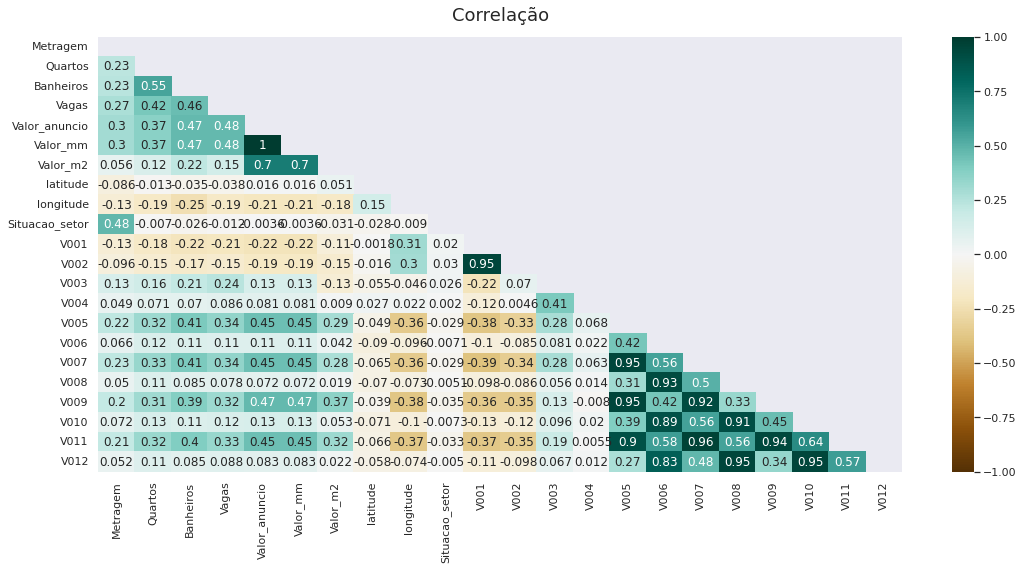

In [657]:
#Colocando a tabela de correlação em um mapa de calor para chamar atenção em alguns pontos:

plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
mask = np.triu(np.ones_like(dados_vendas_censo.corr(), dtype=bool))
heatmap = sns.heatmap(dados_vendas_censo.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação', fontdict={'fontsize':18}, pad=16);

Quanto mais próximo de 1, teremos uma correlação mais verde escura.

Quanto mais próximo de -1, teremos uma correlação amarela escura.

E quanto  mais próximo de 0, mais branca será a correlação.

- Podemos tirar vários insights do mapa de calor, dentre eles, há a correlação 0.47 entre a V009 (renda) e o Valor do imóvel de milhões o que é uma correlação baixa, podendo indicar que uma pessoa que ganha muito, não necessariamente investe em um imóvel com valor muito alto (na casa de milhões). E não necessariamente esta pessoa está morando em um bairro caro.

- No caso da pergunta V005, temos a correlação ainda menor de 0,45. O que pode indicar várias coisas, dentre elas, que a pessoa pode morar num bairro mais arretirado do centro e por isso, pagou menos no valor do m2.

Agora, vamos pegar algumas informações do mapa de calor para começar a treinar o nosso modelo de machine learning.

In [659]:
#Treinando o modelo:

X = dados_vendas_censo[["Metragem"]]
Y = dados_vendas_censo["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)
lr = LinearRegression()

In [660]:
X_train

,Metragem
3522,105
881,240
769,324
3364,484
4674,103
...,...
3558,397
3994,224
5432,238
4044,300


In [661]:
#Treinando o modelo:
lr.fit(X_train, Y_train)

LinearRegression()

In [662]:
Y_predict_test = lr.predict(X_test)

In [663]:
Y_test

172    4500000.00
4513    345000.00
4865    800000.00
4979   4000000.00
1255   5100000.00
          ...    
5240   1600000.00
4472    580000.00
3291   2200000.00
432    1500000.00
2455   2800000.00
Name: Valor_anuncio, Length: 1326, dtype: float64

In [664]:
Y_predict_train = lr.predict(X_train)

In [665]:
Y_train

3522    692000.00
881    1490000.00
769    2100000.00
3364   6700000.00
4674    622500.00
          ...    
3558   4280000.00
3994   1500000.00
5432   2300000.00
4044   1600000.00
948    3280000.00
Name: Valor_anuncio, Length: 3977, dtype: float64

In [666]:
#Métrica para comparação:
#Quanto maior o número do resultado, mais distante está da nossa predição. Soma todos os erros do modelo:

mean_absolute_error(Y_test, Y_predict_test)

1770626.9062636306

In [667]:
#No treino, o valor predito está pior do que o valor absoluto. 
mean_absolute_error(Y_train, Y_predict_train)

1825220.3034549057

Isso aconteceu porque uma variável somente, não é o suficiente para a resolução do problema. Utilizar somente a metragem, não é o suficiente para predizer o valor do imóvel.

In [668]:
#Refazendo o teste utilizando mais de uma variável:

X = dados_vendas_censo[['Metragem', 'Quartos', 'Banheiros', 'Vagas','V001','V007', 'V009']]

Y = dados_vendas_censo["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)
lr.fit(X_train, Y_train)
Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

In [669]:
#Agora é possível observar um resultado melhor do que o anterior, para o absolute error.
mae_test

1349590.384432537

In [670]:
#Este teste, quanto mais próximo de zero, melhor.
#Se este teste desse negativo, indicaria que o modelo não ia fazer uma predição adequada.
r2_test

0.37745069254620534

In [671]:
mae_train

1362945.691504754

In [672]:
r2_train

0.39899592785823335

In [673]:
mae_test

1349590.384432537

In [674]:
r2_test

0.37745069254620534

Pode-se concluir que este não foi um bom modelo para predição de valores de imóveis. E quanto menos variáveis são utilizadas, piores são os resultados do modelo.

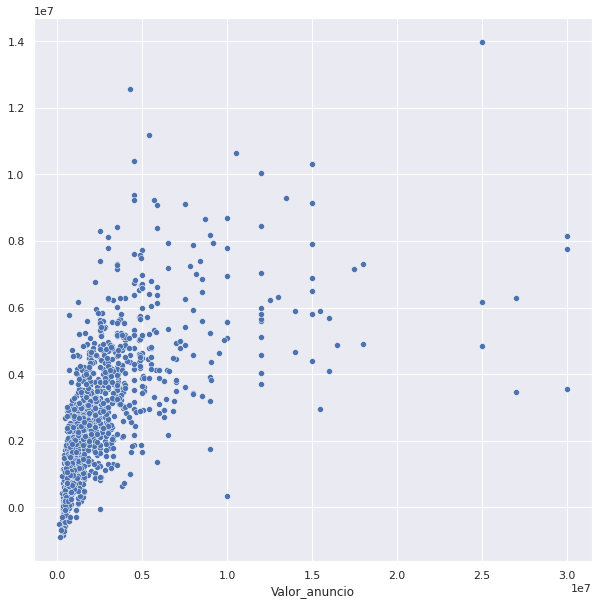

In [675]:
#Plotando um gráfico com os resultados acima para vizualização melhor:

plt.figure(figsize=(10, 10))
sns.scatterplot(x=Y_test, y=Y_predict_test)

Há uma concentração entre valores abaixo de 300mil, e após, o gráfico fica muito disperso.

#CONCLUSÕES

Considerando o caso da Creditas, este modelo poderia ser utilizado para clientes na faixa de preço acima mencionado (100 e 300mil) para trazer uma resposta mais rápida se aceita ou não o empréstimo do cliente.

Percebemos que para valores acima de um milhão, este modelo não foi fidedigno.

Este modelo não superou as expectativas, fazendo-se necessário testar outros modelos e compará-los até chegar em um resultado interessante e que fará mais sentido de acordo com o desejado.

O projeto está finalizado, mas pretendo ir aperfeiçoando conforme meus estudos. Tive algumas limitações na construção do projeto, por falta de conhecimento suficiente sobre os modelos de ML.